In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files
import io

from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import ttest_ind
import numpy as np
import seaborn as sns
from scipy.stats import ttest_ind, f_oneway

In [ ]:
uploaded = files.upload()

Saving Facebook_Dataset.csv to Facebook_Dataset.csv


In [ ]:
data = pd.read_csv(io.BytesIO(uploaded['dataset_Facebook - dataset_Facebook.csv.csv']))
data.head()

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumption,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393


In [ ]:
Monday = data[data['Post Weekday'] == 1]['Lifetime Post Total Reach']
Tuesday = data[data['Post Weekday'] == 2]['Lifetime Post Total Reach']
Wednesday = data[data['Post Weekday'] == 3]['Lifetime Post Total Reach']
Thursday = data[data['Post Weekday'] == 4]['Lifetime Post Total Reach']
Friday = data[data['Post Weekday'] == 5]['Lifetime Post Total Reach']
Saturday = data[data['Post Weekday'] == 6]['Lifetime Post Total Reach']
Sunday = data[data['Post Weekday'] == 7]['Lifetime Post Total Reach']

In [ ]:
f_stat, p_value_anova = f_oneway(Monday, Tuesday, Wednesday, Thursday, Friday, Saturday, Sunday)
f_stat, p_value_anova
print(f"ANOVA: f_stat={f_stat:.2f}, p_value={p_value_anova:.2f}")

ANOVA: f_stat=0.79, p_value=0.58


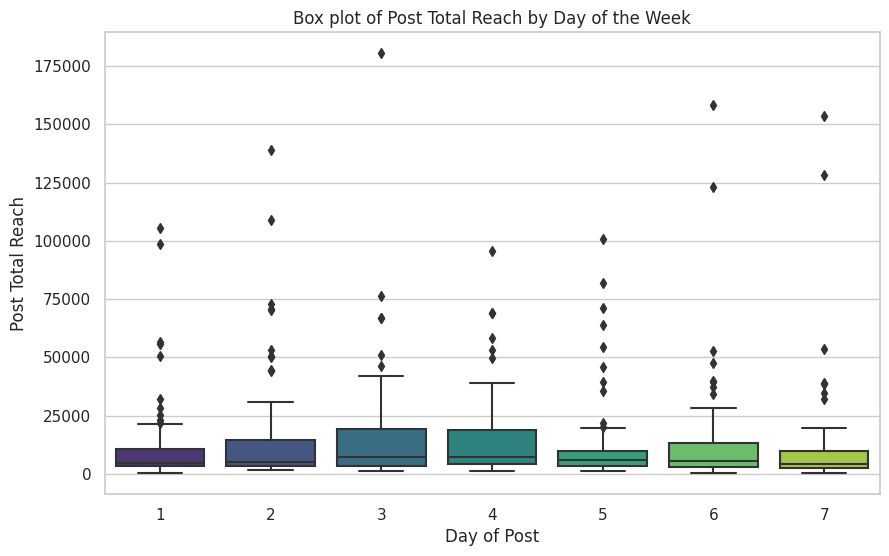

In [ ]:
# Set style
sns.set(style="whitegrid")

plt.figure(figsize=(10,6))
sns.boxplot(x='Post Weekday', y='Lifetime Post Total Reach', data=data, palette='viridis')
plt.title('Box plot of Post Total Reach by Day of the Week')
plt.xlabel('Day of Post')
plt.ylabel('Post Total Reach')
plt.show()

In [ ]:
# Prepare the data for Tukey's HSD test and Bonferroni correction
data_concat = pd.concat([Monday, Tuesday, Wednesday, Thursday, Friday, Saturday, Sunday])
labels = ['Monday'] * len(Monday) + ['Tuesday'] * len(Tuesday) + ['Wednesday'] * len(Wednesday) + ['Thursday'] * len(Thursday)+ ['Friday'] * len(Friday)+ ['Saturday'] * len(Saturday)+ ['Sunday'] * len(Sunday)

# Perform Tukey's HSD Test
print("\nTukey's HSD Test:")
tukey = pairwise_tukeyhsd(endog=data_concat, groups=labels, alpha=0.05)
print(tukey)

# Perform pairwise t-tests with Bonferroni correction
print("\nPairwise t-tests with Bonferroni Correction:")
comparisons = [(1, 2), (1, 3), (1, 4),(1, 5), (1, 6), (1, 7),(2, 3), (2, 4), (2, 5),(2, 6), (2, 7), (3, 4), (3, 5), (3, 6),(3, 7), (4, 5), (4, 6),(4, 7), (5, 6), (5, 7),(6, 7)]
bonferroni_alpha = 0.05 / len(comparisons)
for group1, group2 in comparisons:
    stat, p = ttest_ind(data[data['Post Weekday'] == group1]['Lifetime Post Total Reach'],
                        data[data['Post Weekday'] == group2]['Lifetime Post Total Reach'])
    print(f"{group1} vs {group2}: t={stat:.2f}, p={p:.2f}, p<{bonferroni_alpha} -> {'Significant' if p < bonferroni_alpha else 'Not Significant'}")


Tukey's HSD Test:
       Multiple Comparison of Means - Tukey HSD, FWER=0.05        
 group1    group2   meandiff  p-adj     lower      upper    reject
------------------------------------------------------------------
  Friday    Monday  -817.0748    1.0  -12420.857 10786.7073  False
  Friday  Saturday   199.4413    1.0 -10932.6174    11331.5  False
  Friday    Sunday -2118.8213 0.9977 -13220.1087  8982.4662  False
  Friday  Thursday  2456.6188 0.9956  -8986.0754  13899.313  False
  Friday   Tuesday  3687.3195  0.967  -8003.3933 15378.0324  False
  Friday Wednesday  4289.7698 0.9344  -7492.6041 16072.1437  False
  Monday  Saturday  1016.5162    1.0 -10070.6539 12103.6862  False
  Monday    Sunday -1301.7464 0.9999 -12358.0203  9754.5275  False
  Monday  Thursday  3273.6936 0.9794  -8125.3353 14672.7225  False
  Monday   Tuesday  4504.3944 0.9138  -7143.5829 16152.3717  False
  Monday Wednesday  5106.8447 0.8574  -6633.1274 16846.8167  False
Saturday    Sunday -2318.2626  0.995 -12878